In [33]:
from sklearn.cluster import KMeans
import pandas as pd   
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt   


In [34]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'income')

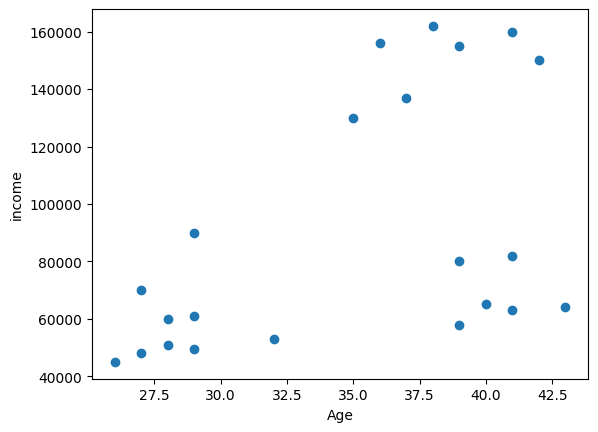

In [35]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('income')

In [36]:
km=KMeans(n_clusters=3)

y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [37]:
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [38]:
km.cluster_centers_ # cluster center mana 2d poinnt in 2d plane

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [39]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

C:\Users\dibya\AppData\Local\Temp\ipykernel_12544\1351784966.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


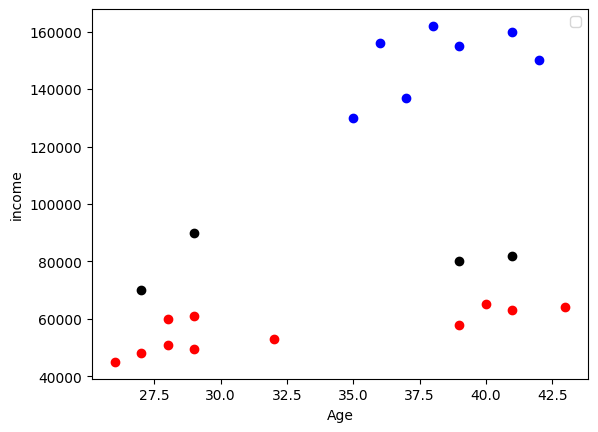

In [40]:
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

In [41]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

# Scaling 'Income($)'
scale.fit(df[['Income($)']])
df['Income($)'] = scale.transform(df[['Income($)']])

# Scaling 'Age'
scale.fit(df[['Age']])
df['Age'] = scale.transform(df[['Age']])
df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [42]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [43]:
df['cluster1'] = y_predict
df_without_cluster = df.drop('cluster', axis=1)
df_without_cluster

,Name,Age,Income($),cluster1
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [47]:
#for finding centroids of the cluster 
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

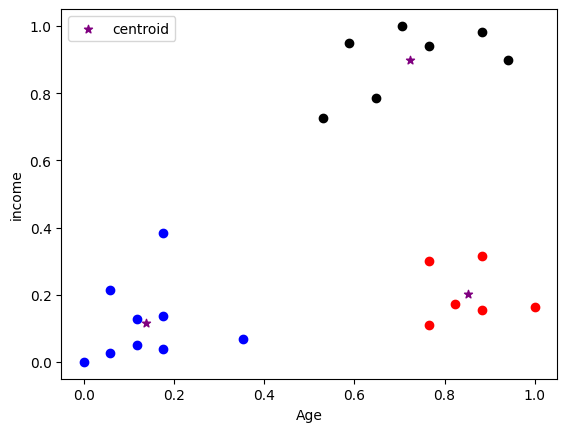

In [49]:
df1=df[df.cluster1==0]
df2=df[df.cluster1==1]
df3=df[df.cluster1==2]
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

In [51]:
k_ran=range(1,10)
sse=[]
for k in k_ran:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

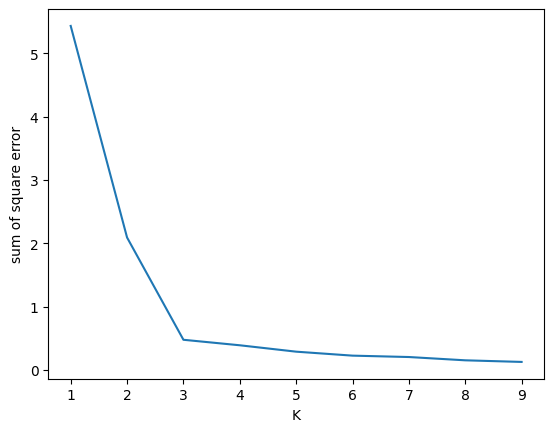

In [52]:
plt.xlabel('K')
plt.ylabel('sum of square error')
plt.plot(k_ran,sse)